# Módulo 10 atividade 1

Uma instituição financeira quer conhecer melhor o perfil de renda de seus novos clientes para diversos fins, por exemplo, melhor dimensionar o limite de cartões de crédito dos novos clientes, sem necessariamente solicitar olerites ou documentações que impactem na experiência do seu cliente.

Para isto, conduziu um estudo com alguns clientes, comprovando suas rendas através de olerites e outros documentos, e pretende construir um modelo preditivo para esta renda com base em algumas variáveis que já possui em seu banco de dados.

As variáveis são intuitivas - note que há uma variável 'index' que é um identificador do cliente e que em geral o ```read_csv``` do pandas coloca também uma variável sequencial.

Estes dados estão no arquivo ```previsao_de_renda.csv```. Carregue-o em um *dataframe*.

1) Avalie a estrutura de correlação das variáveis quantitativas através de um gráfico de "matriz de dispersão" e através da avaliação gráfica da matriz de correlações. Veja se você identifica algum padrão interessante ou que te faça sentido.

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

In [2]:
df_previsao_de_renda = pd.read_csv('previsao_de_renda.csv')
df_previsao_de_renda.head()

,Unnamed: 0,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
0,0,2015-01-01,8682,F,False,True,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,False,3369.24
1,1,2015-01-01,12830,M,True,True,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,False,6096.14
2,2,2015-01-01,2885,M,True,True,2,Assalariado,Superior completo,Casado,Casa,31,8.065753,4.0,False,5658.98
3,3,2015-01-01,16168,F,True,False,0,Empresário,Secundário,Casado,Casa,50,1.208219,2.0,False,7246.69
4,4,2015-01-01,12438,M,False,False,0,Assalariado,Secundário,Casado,Casa,52,13.873973,2.0,False,4017.37


In [3]:
df_previsao_de_renda.shape

(15000, 16)

In [4]:
df_previsao_de_renda.columns

Index(['Unnamed: 0', 'data_ref', 'index', 'sexo', 'posse_de_veiculo',
       'posse_de_imovel', 'qtd_filhos', 'tipo_renda', 'educacao',
       'estado_civil', 'tipo_residencia', 'idade', 'tempo_emprego',
       'qt_pessoas_residencia', 'mau', 'renda'],
      dtype='object')

In [5]:
# Analisando como está armazenado a coluna de data para entender se é relevante manter para fazer as análises
df_previsao_de_renda['data_ref'].unique()

array(['2015-01-01', '2015-02-01', '2015-03-01', '2015-04-01',
       '2015-05-01', '2015-06-01', '2015-07-01', '2015-08-01',
       '2015-09-01', '2015-10-01', '2015-11-01', '2015-12-01',
       '2016-01-01', '2016-02-01', '2016-03-01'], dtype=object)

A coluna de data está como cadeia de caracteres. Existem apenas uma única data por mês, o que indica que ou todos os dados de cada mês foram registrados em um único dia, nesse caso, no primeiro, ou que os dados não são precisos. Para esse modelo, não era necessário ter o dia, era melhor ter registrado apenas o mês e ano. Não será necessário, pelo menos nesse primeiro momento, manter essa coluna para as análises.

In [6]:
# Excluindo colunas que não serão necessárias
previsao_renda = df_previsao_de_renda.drop(['Unnamed: 0', 'index', 'mau'], axis=1)
previsao_renda.head()

,data_ref,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
0,2015-01-01,F,False,True,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,3369.24
1,2015-01-01,M,True,True,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,6096.14
2,2015-01-01,M,True,True,2,Assalariado,Superior completo,Casado,Casa,31,8.065753,4.0,5658.98
3,2015-01-01,F,True,False,0,Empresário,Secundário,Casado,Casa,50,1.208219,2.0,7246.69
4,2015-01-01,M,False,False,0,Assalariado,Secundário,Casado,Casa,52,13.873973,2.0,4017.37


In [7]:
# Criando um novo dataframe apenas com as colunas quantitativas
previsao_renda_corr = previsao_renda[['qtd_filhos', 'idade', 'tempo_emprego', 'qt_pessoas_residencia', 'renda']]
previsao_renda_corr.head()

,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,renda
0,1,36,3.575342,3.0,3369.24
1,0,42,0.860274,2.0,6096.14
2,2,31,8.065753,4.0,5658.98
3,0,50,1.208219,2.0,7246.69
4,0,52,13.873973,2.0,4017.37


In [8]:
# Matriz de correlação
previsao_renda_corr.corr()

,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,renda
qtd_filhos,1.000000,-0.364303,-0.074250,0.896488,0.009567
idade,-0.364303,1.000000,0.323934,-0.338805,0.042570
tempo_emprego,-0.074250,0.323934,1.000000,-0.065748,0.394235
qt_pessoas_residencia,0.896488,-0.338805,-0.065748,1.000000,0.020977
renda,0.009567,0.042570,0.394235,0.020977,1.000000


C:\Users\Kelvi Orloviki\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


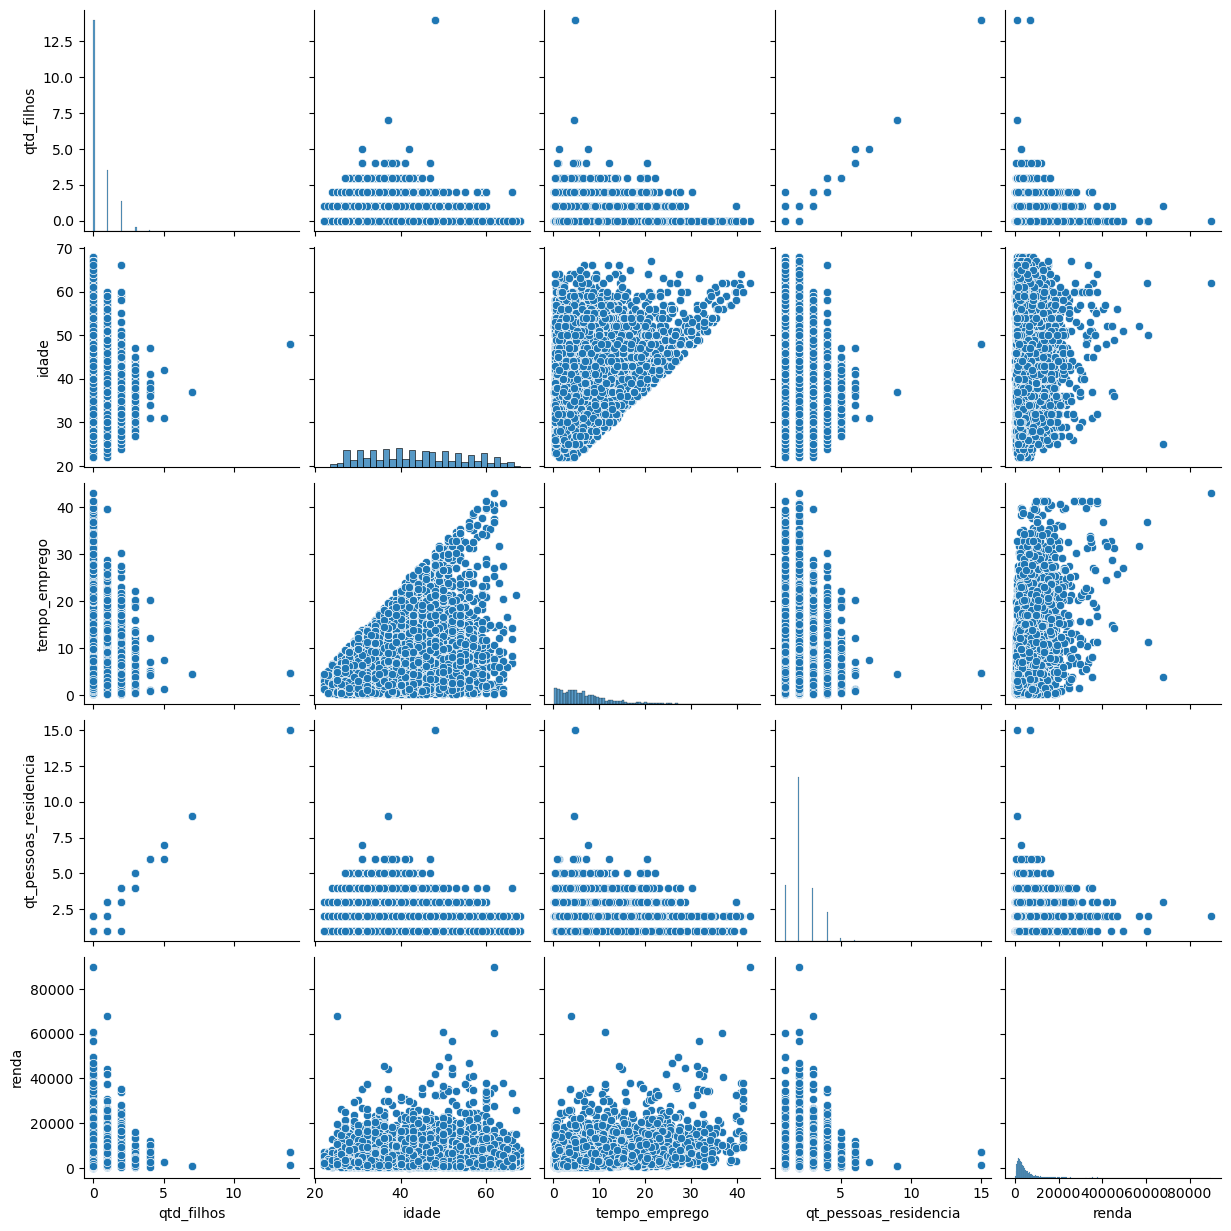

In [9]:
# Análises gráficas
sns.pairplot(previsao_renda_corr)

Analisando os gráficos isoladamente, é difícil enxergar qualquer tipo de correlação sem indicarmos primeiro tanto a variável explicativa como a variável resposta, a não ser os casos bem óbvios, como por exemplo, ter mais filhos aumenta a quantidade de pessoas em uma residência.
Com a matriz ao menos é mais fácil identificar a correlação entre as variáveis. As variáveis com mais correlação com a variável "renda", por exemplo, são as variáveis "tempo_emprego" e "idade" respectivamente.

2) Avalie um gráfico de dispersão (*scatterplot*) específico para as duas variáveis mais correlacionadas com *renda*.

C:\Users\Kelvi Orloviki\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


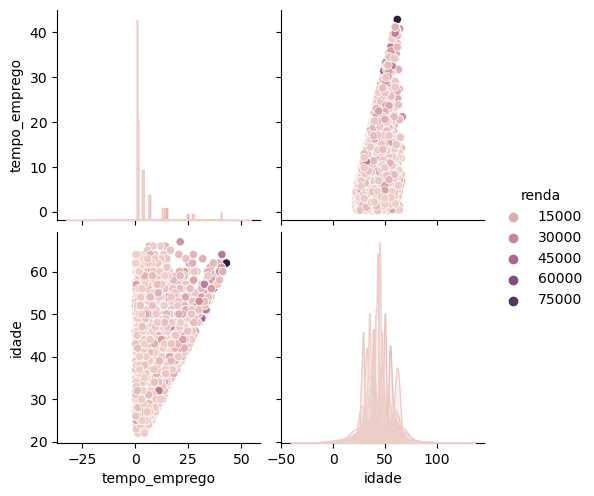

In [10]:
corr_renda = previsao_renda_corr[['tempo_emprego', 'idade', 'renda']]

sns.pairplot(corr_renda, hue='renda')

Agora com as variáveis explicativas e a variável resposta, é possível enxergar através do gráfico a correlação existente.
Quanto maior a renda, mais forte fica o tom de roxo do gráfico. Podemos ver a tendência de bolhas mais escuras conforme o tempo de emprego aumenta, assim como quando a idade da pessoa aumenta.

3) Na su aopinião, há outliers na variável renda?

Para tentar identificar um outlier, será analisado dois gráficos de regresão com as variáveis que a matriz de correlação mostrou que possuiam mais correlação com a variável renda.

<Axes: xlabel='tempo_emprego', ylabel='renda'>

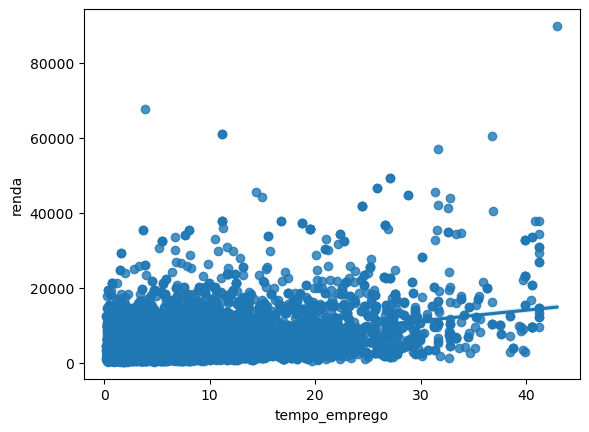

In [11]:
sns.regplot(data=corr_renda, x='tempo_emprego', y='renda')

<Axes: xlabel='idade', ylabel='renda'>

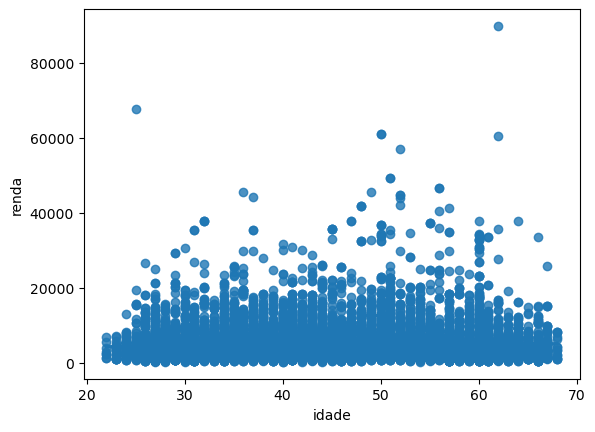

In [12]:
sns.regplot(data=corr_renda, x='idade', y='renda')

Definitivamente exisem outliers. Existe uma correlação de que quanto maior o tempo de emprego e a idade, maior a renda, porém o ponto onde tem a segunda maior renda se encontra na faixa de menos de 10 anos de tempo de emprego, assim como para a idade, a segunda maior renda se encontra na faixa etária de 20 a 30 anos.

No primeiro gráfico (tempo de emprego), ainda é possível ver a linha que mostra a tendência subindo levemente no final do eixo "x", depois da concentração maior de pontos na primeira metade do gráfico. Já no segundo gráfico (idade), nem mesmo é possível ver a linha, devido a concentração de renda, independente da idade, estar agrupado abaixo dos 20000.

<Axes: xlabel='renda', ylabel='tempo_emprego'>

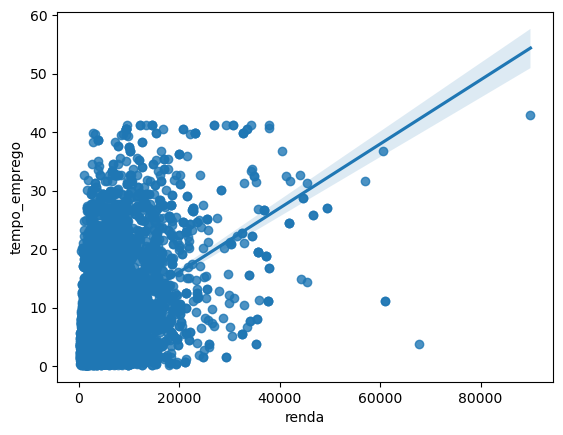

In [13]:
# Analisar os mesmo gráficos com os eixos invertidos

sns.regplot(data=corr_renda, x='renda', y='tempo_emprego')

<Axes: xlabel='renda', ylabel='idade'>

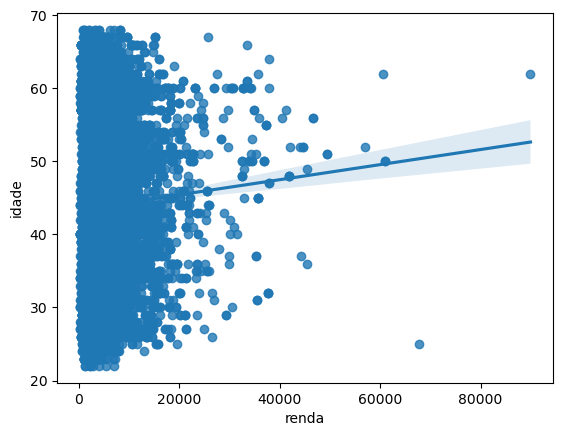

In [14]:
sns.regplot(data=corr_renda, x='renda', y='idade')

Quando trazemos a variável renda como explicativa, é possível ver a linha de tendência nos dois gráficos. A leitura é a mesma, principalmente quando a variável resposta é a idade, com a maior concentração de pontos abaixo dos 20000 e muitos outliers.

No gráfico onde a variável resposta é o tempo de emprego os outliers acentuam muito mais a linha de tendência.

4) Calcule o logaritmo da variável renda e repita a sequência de análise

,tempo_emprego,idade,renda,log_renda
tempo_emprego,1.000000,0.323934,0.394235,0.379556
idade,0.323934,1.000000,0.042570,0.024712
renda,0.394235,0.042570,1.000000,0.835734
log_renda,0.379556,0.024712,0.835734,1.000000


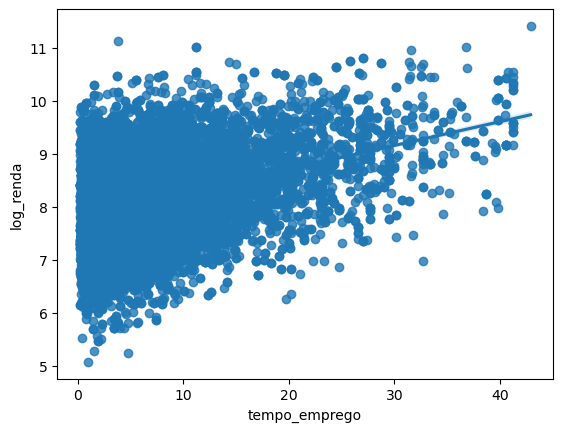

In [15]:
renda_log = corr_renda.copy()
renda_log['log_renda'] = np.log(renda_log['renda'])

sns.regplot(data=renda_log, x='tempo_emprego', y='log_renda')
renda_log.corr()

<Axes: xlabel='idade', ylabel='log_renda'>

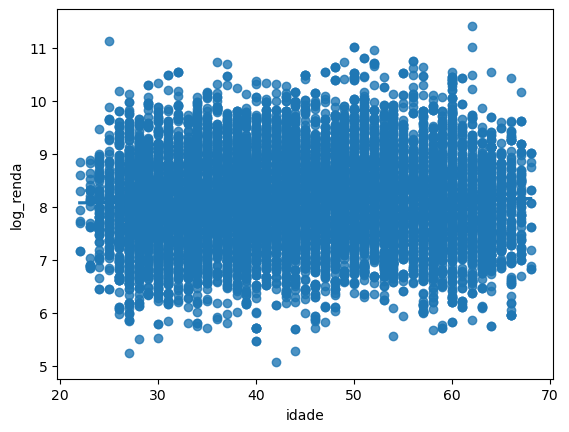

In [16]:
sns.regplot(data=renda_log, x='idade', y='log_renda')

Analisando pelo log, a correlação na matriz de correlação diminui.

Os gráficos mostram os pontos mais agrupados em torno da linha de tendência e refletem melhor a variável. Existe um achatamento de bolhas no início do eixo "x" em torno da linha e existem outliers quando a resposta da variável explicativa é tempo de emprego, mas o gráfico reflete melhor a análise.

Por outro lado, quando a variável explicativa é a idade, a linha de mantém totalmente na horizontal, sem nenhum inclinação, indicando que não existe correlação ou ela é muito baixa. Os pontos estão agrupados em torno da linha de tendência, mas o volume se mantém independente da idade. É possível enxergar a ponta de início e fim da linha de tendência.

5) A aplicação do LOG você acha que melhorou ou piorou a análise?

Melhorou, vide resposta acima.